In [6]:
import cv2 as cv
import numpy as np

def linContrastStretching(img, a, b):
    height = img.shape[0]
    width = img.shape[1]

    blue = img[:,:,0]
    green = img[:,:,1]
    red = img[:,:,2]

    bmax = np.max(blue)
    rmax = np.max(red)
    gmax = np.max(green)

    bmin = np.min(blue)
    rmin = np.min(red)
    gmin = np.min(green)

    tempb = (b - a)/(bmax - bmin)
    tempg = (b - a)/(gmax - gmin)
    tempr = (b - a)/(rmax - rmin)

    # np.clip makes sure that the values are between the range of 0 and 255
    # astype uint8 makes sure that the data type is the right one for pixels(unsigned 8-bits)
    blue = np.clip(a + ((blue-bmin)*tempb),0,255).astype(np.uint8)
    green = np.clip(a + ((green-gmin)*tempg),0,255).astype(np.uint8)
    red = np.clip(a + ((red-rmin)*tempr),0,255).astype(np.uint8)
    
    # to stack the arrays together we use np.stack() with the axis = 2
    # axis = 2 is column wise stacking so it will be the columns of bgr in a row
    img = np.stack((blue,green,red),axis=2)
    # for i in range(height):
    #     for j in range(width):
    #         bl = a + ((img[i][j][0] - bmin)*tempb)
    #         g = a + ((img[i][j][1] - gmin)*tempg)
    #         r = a + ((img[i][j][2] - rmin)*tempr)
    #         img[i][j] = (bl,g,r)
    
    return img    

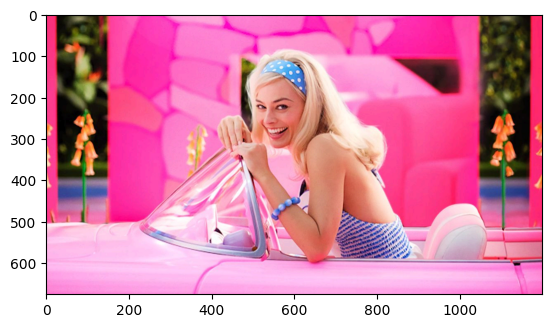

In [7]:
import matplotlib.pyplot as plt
import os

img = cv.imread("../images/barbie_flat.png")

output = linContrastStretching(img,0,255)
os.chdir("../images")
cv.imwrite("barbie.png",output)

# img is bgr so convert to rgb
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
plt.imshow(output)

In [11]:
def frequentColors(img,k):
    uni,freq = np.unique(img, return_counts = True)
    max = []
    for i in range(k):
        temp = np.argmax(freq) # choose pixels with most freq
        freq[temp] = 0
        max.append(uni[temp])

    return max

k=5 most frequent colors in the original image: 
[55, 54, 45, 46, 52]

k=5 most frequent colors of the first output: 
[255, 250, 205, 210, 240]

k=5 most frequent colors of the first output: 
[150, 148, 130, 132, 144]

k=5 most frequent colors of the first output: 
[200, 198, 180, 182, 194]


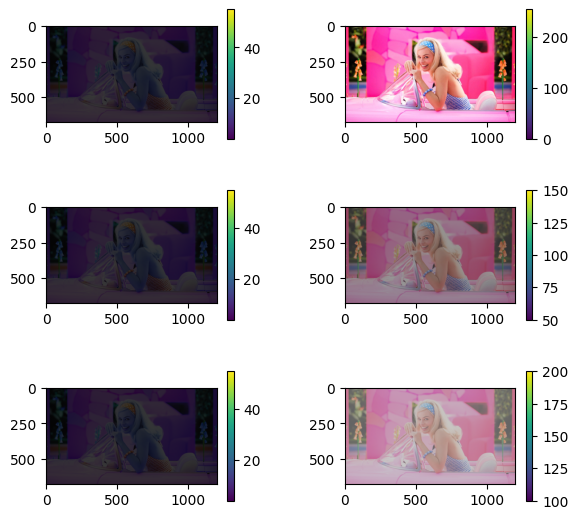

In [22]:
# output for different values of a and b

plt.subplot(4,2,1)
plt.imshow(img)
plt.colorbar()
plt.subplot(4,2,3)
plt.imshow(img)
plt.colorbar()
plt.subplot(4,2,5)
plt.imshow(img)
plt.colorbar()
color = frequentColors(img,5)
print("k=5 most frequent colors in the original image: ")
print(color)
# adjust spacing between plots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.4,
                    hspace=0.4)

output = linContrastStretching(img,0,255)
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
plt.subplot(4,2,2)
plt.imshow(output)
plt.colorbar()
color = frequentColors(output,5)
print("\nk=5 most frequent colors of the first output: ")
print(color)

output = linContrastStretching(img,50,150)
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
plt.subplot(4,2,4)
plt.imshow(output)
plt.colorbar()
color = frequentColors(output,5)
print("\nk=5 most frequent colors of the first output: ")
print(color)

output = linContrastStretching(img,100,200)
output = cv.cvtColor(output,cv.COLOR_BGR2RGB)
plt.subplot(4,2,6)
plt.imshow(output)
plt.colorbar()
color = frequentColors(output,5)
print("\nk=5 most frequent colors of the first output: ")
print(color)